In [1]:
from numpy import array,sqrt,pi,sin
from scipy import integrate
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
def convert(angle):
    return angle*np.pi/180

convert(90)

1.5707963267948966

In [3]:
def recenter(angle):
    angle_plus_pi = -angle + np.pi
    angle_plus_pi_modulo = angle_plus_pi%(2*np.pi)
    return -(angle_plus_pi_modulo - np.pi)

recenter(3*np.pi+1)

-2.141592653589793

In [4]:
%%writefile anglesutils.py
import numpy as np

def convert(angle):
    # takes angle from degrees to radians
    return angle*np.pi/180

def recenter(angle):
    # recenters angle in radians to (-pi,pi) interval
    angle_plus_pi = -angle + np.pi
    angle_plus_pi_modulo = angle_plus_pi%(2*np.pi)
    return -(angle_plus_pi_modulo - np.pi)

Overwriting anglesutils.py


In [5]:
# importing package as au
import anglesutils as au

In [6]:
def position(t):
    # centrifuge position in degrees
    # t is in seconds
    return 45 + t**2

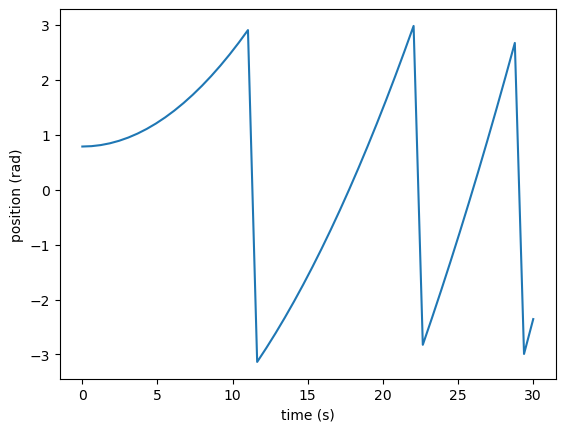

In [7]:
# setting up time variable
t=np.linspace(0,30)
# computing position as a function of time
x=position(t)
# plotting
plt.plot(t,au.recenter(au.convert(x)))
# adding labels
plt.xlabel('time (s)')
plt.ylabel('position (rad)');

exercises

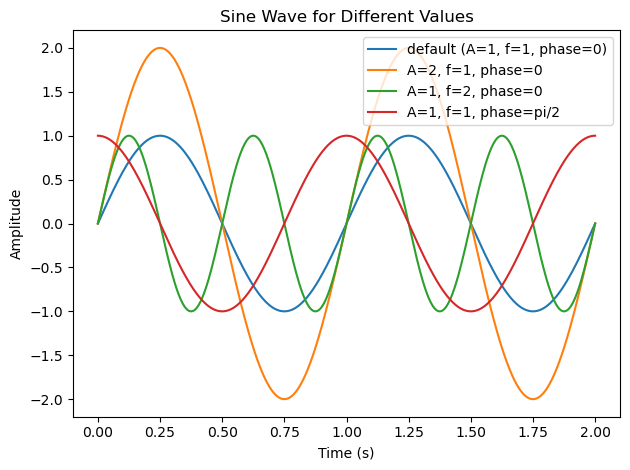

In [9]:
# exercise 1

# defining function using sine wave formula. using 2pi * frequency to get angular frequency
def func1(time,amplitude=1,frequency=1,phase=0):
    return amplitude * np.sin((2*np.pi*frequency)*time + phase)

# testing it with different values and plotting

t= np.linspace(0,2,500)
# creating 500 equally spaces points bet. 0 & 2 seconds. will show 2 cycles
plt.plot(t, func1(t), label='default (A=1, f=1, phase=0)')
plt.plot(t, func1(t, amplitude=2), label='A=2, f=1, phase=0')
plt.plot(t, func1(t, frequency=2), label='A=1, f=2, phase=0')
plt.plot(t, func1(t, phase=np.pi/2), label='A=1, f=1, phase=pi/2')

# adding labels & legend
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave for Different Values')
plt.legend()
plt.tight_layout();

In [10]:
# exercise 2
# 1.
'''
from newton's laws of gravitation and circular motion,
centripetal force = gravitational force
> (4pi^2r)/T^2 = GM/r^2
> r^3 = (GMT^2)/(4pi^2)
> r = ( (GMT^2)/(4pi^2) )^(1/3)

to find height above earth's surface we subtract earth's radius
> h = ( (GMT^2)/(4pi^2) )^(1/3) - R
'''
# 2.
def height(T):
    # calculates satellite height above earth's surface for a given otbital period T
    #constants
    G=6.67e-11 # gravitational constant in m^3kg^-1s^-2
    M=5.97e24 # earth's mass in kg
    R=6.38e6 # earth's radius in m
    # formula
    h=((G*M*(T**2)) / (4*(np.pi**2)))**(1/3) - R
    return h # in m

# 3.
# requesting user input
T_input= float(input('Please enter orbital period in seconds:'))
#calculating height
height_input_km=height(T_input)/1000 # dividing by 1000 to get km
#displaying result
print(f"Satellite's altitude above earth's surface: {height_input_km:.2f} km ")
print()
# 4.
# calculating altitudes for different orbital periods
# setting variables for different periods
T_day = 24*60*60 # 1 day in seconds
T_90min = 90*60 # 90 minutes in seconds
T_45min = 45*60 # 45 minutes in seconds
# calculating altitudes and converting to km
height_T_day_km = height(T_day)/1000
height_T_90min_km = height(T_90min)/1000
height_T_45min_km = height(T_45min)/1000
# displaying results
print(f"Altitude for a 24h orbit: {height_T_day_km:.2f} km")
print(f"Altitude for a 90min orbit: {height_T_90min_km:.2f} km")
print(f"Altitude for a 45min orbit: {height_T_45min_km:.2f} km")

# the altitude for a 45min orbit is negative meaning it would 
# be orbiting inside earth's surface which is not possible!!!!


Please enter orbital period in seconds: 10000


Satellite's altitude above earth's surface: 3648.75 km 

Altitude for a 24h orbit: 35846.91 km
Altitude for a 90min orbit: 270.32 km
Altitude for a 45min orbit: -2190.56 km


In [11]:
%%writefile linfit.py
from numpy import polyfit
from numpy import poly1d, linspace, mean
import numpy as np
def linfit(x,y):
    p_coeffc = polyfit( x, y, 1 ) #degree 1 for a straight line
    #n is the number of data points for x_data
    n = len(x)
    #x_bar is the average x_data
    x_bar = mean(x)
    #D is the error(??)
    D = sum(x**2) - ((1/n) * sum(x)**2)
    #polyfit
    p_coeffc = polyfit(x, y, 1)
    p_coeffc, residuals, _, _, _ = polyfit(x, y, 1, full=True)
    rc=residuals[0]
    #errors for dm and dc
    dmc_squared = 1./(n-2)*residuals/D 
    dcc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals/D
    dmc=np.sqrt(dmc_squared)
    dcc=np.sqrt(dcc_squared)
    mc=p_coeffc[0]
    cc=p_coeffc[1]

    return cc, mc, dmc, dcc

Writing linfit.py


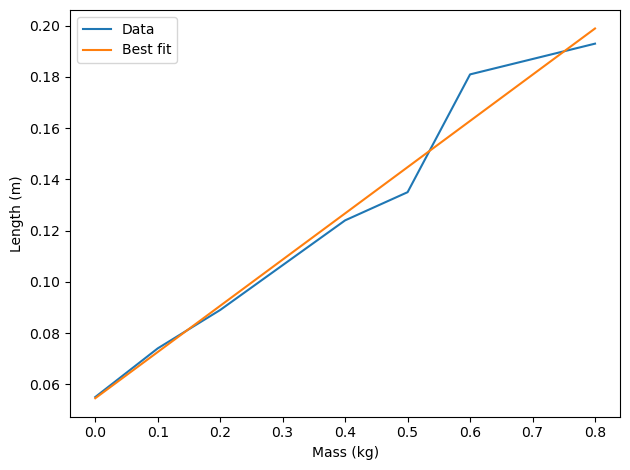

In [36]:
from linfit import linfit
import numpy as np
x_data= np.array([0,0.1,0.2,0.4,0.5,0.6,0.8]) #mass (kg)
y_data= np.array([0.055, 0.074, 0.089,0.124, 0.135, 0.181, 0.193]) #length (m)
cc, mc, dmc, dcc = linfit(x_data,y_data)

#best fit line
p_coeffd = polyfit( x_data, y_data, 1 ) #degree 1 for a straight line
pd = poly1d( p_coeffd )
xd=linspace( min(x_data), max(x_data), 100 ) 

#plotting
plt.plot(x_data, y_data, label="Data")
plt.plot(xd,pd(xd), label="Best fit")


# adding labels & legend
plt.xlabel('Mass (kg)')
plt.ylabel('Length (m)')
plt.legend()
plt.tight_layout();